In [ ]:
# მხოლოდ საჭიროების შემთხვევაში
!pip install pandas matplotlib


##### საჭირო მოდულების იპმპორტი

In [1]:
import pandas as pd


## Simple linear Regression

##### მონაცემთა წაკითხვა CSV ფაილიდან

In [2]:
df_car_engine_price = pd.read_csv('car_engine_price.csv')
df_car_engine_price.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   HorsePower  200 non-null    int64  
 1   Price       200 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.3 KB


##### მონაცემების დაყოფა დამოუკიდებელ და დამოკიდებულ ნაწილებად

In [3]:
X = df_car_engine_price.drop('Price', axis=1)
y = df_car_engine_price['Price']


##### დამოუკიდებელი მონაცემების ტიპების შემოწმება

In [4]:
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   HorsePower  200 non-null    int64
dtypes: int64(1)
memory usage: 1.7 KB


##### მონაცემების დაყოფა სასწავლო და სატესტო ნაწილებად

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)


##### ერთგანზომილებიანი წრფივი რეგრესიის მოდელის სწავლება

In [6]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

##### სატესტო მონაცემების პროგნოზი

In [7]:
y_pred = regressor.predict(X_test)


###### გამოვთვალოთ მოდელის ეფექტურობა

In [8]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)


0.636021805071094

###### მოდელის ეფექტურობა მივიღეთ 0.64 აქედან გამომდინარე ამ მონაცემებისთვის წრფივი რეგრესია არ არის ზუსტი, გრაფიკი რომ ავაგოთ დავინახავთ რომ თითქოს კვადრატული რეგრესიაა

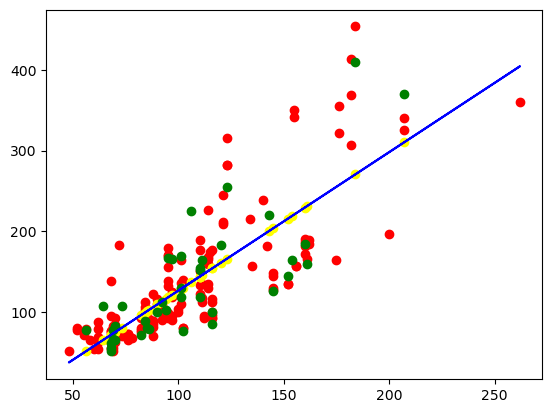

In [9]:
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.scatter(X_test, y_pred, color = 'yellow')
plt.scatter(X_test, y_test, color = 'green')
plt.show()


## Multiple linear Regression

##### მონაცემთა წაკითხვა CSV ფაილიდან

In [10]:
df_house_price = pd.read_csv('House Price India.csv')
df_house_price.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14619 entries, 0 to 14618
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14619 non-null  int64  
 1   Date                                   14619 non-null  int64  
 2   number of bedrooms                     14619 non-null  int64  
 3   number of bathrooms                    14619 non-null  float64
 4   living area                            14619 non-null  int64  
 5   lot area                               14619 non-null  int64  
 6   number of floors                       14619 non-null  float64
 7   waterfront present                     14619 non-null  int64  
 8   number of views                        14619 non-null  int64  
 9   condition of the house                 14619 non-null  int64  
 10  grade of the house                     14619 non-null  int64  
 11  Ar

##### მონაცემების დაყოფა დამოუკიდებელ და დამოკიდებულ ნაწილებად

In [11]:
X = df_house_price.loc[:, [
    'number of bedrooms', 'number of bathrooms', 'living area', 'lot area', 
    'number of floors', 'waterfront present',
    'number of views', 'condition of the house', 'grade of the house',
    'Area of the house(excluding basement)', 'Area of the basement',
    'Built Year', 'Renovation Year', 'living_area_renov', 'lot_area_renov',
    'Number of schools nearby', 'Distance from the airport'
]]
y = df_house_price['Price']


##### დამოუკიდებელი მონაცემების ტიპების შემოწმება

In [12]:
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14619 entries, 0 to 14618
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   number of bedrooms                     14619 non-null  int64  
 1   number of bathrooms                    14619 non-null  float64
 2   living area                            14619 non-null  int64  
 3   lot area                               14619 non-null  int64  
 4   number of floors                       14619 non-null  float64
 5   waterfront present                     14619 non-null  int64  
 6   number of views                        14619 non-null  int64  
 7   condition of the house                 14619 non-null  int64  
 8   grade of the house                     14619 non-null  int64  
 9   Area of the house(excluding basement)  14619 non-null  int64  
 10  Area of the basement                   14619 non-null  int64  
 11  Bu

##### მონაცემების დაყოფა სასწავლო და სატესტო ნაწილებად

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)


##### მრავალგანზომილებიანი წრფივი რეგრესიის მოდელის სწავლება

In [14]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

##### სატესტო მონაცემების პროგნოზი

In [15]:
y_pred = regressor.predict(X_test)


###### გამოვთვალოთ მოდელის ეფექტურობა

In [16]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)


0.6555350912517297

###### მოდელის ეფექტურობა მივიღეთ 0.66 აქედან გამომდინარე ამ მონაცემებისთვის წრფივი რეგრესია არ არის ზუსტი

## Decision Tree Regression

##### მონაცემთა წაკითხვა CSV ფაილიდან

In [17]:
df_house_price = pd.read_csv('House Price India.csv')
df_house_price.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14619 entries, 0 to 14618
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14619 non-null  int64  
 1   Date                                   14619 non-null  int64  
 2   number of bedrooms                     14619 non-null  int64  
 3   number of bathrooms                    14619 non-null  float64
 4   living area                            14619 non-null  int64  
 5   lot area                               14619 non-null  int64  
 6   number of floors                       14619 non-null  float64
 7   waterfront present                     14619 non-null  int64  
 8   number of views                        14619 non-null  int64  
 9   condition of the house                 14619 non-null  int64  
 10  grade of the house                     14619 non-null  int64  
 11  Ar

##### მონაცემების დაყოფა დამოუკიდებელ და დამოკიდებულ ნაწილებად

In [18]:
X = df_house_price.loc[:, [
    'number of bedrooms', 'number of bathrooms', 'living area', 'lot area', 
    'number of floors', 'waterfront present',
    'number of views', 'condition of the house', 'grade of the house',
    'Area of the house(excluding basement)', 'Area of the basement',
    'Built Year', 'Renovation Year', 'living_area_renov', 'lot_area_renov',
    'Number of schools nearby', 'Distance from the airport'
]]
y = df_house_price['Price']


##### დამოუკიდებელი მონაცემების ტიპების შემოწმება

In [19]:
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14619 entries, 0 to 14618
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   number of bedrooms                     14619 non-null  int64  
 1   number of bathrooms                    14619 non-null  float64
 2   living area                            14619 non-null  int64  
 3   lot area                               14619 non-null  int64  
 4   number of floors                       14619 non-null  float64
 5   waterfront present                     14619 non-null  int64  
 6   number of views                        14619 non-null  int64  
 7   condition of the house                 14619 non-null  int64  
 8   grade of the house                     14619 non-null  int64  
 9   Area of the house(excluding basement)  14619 non-null  int64  
 10  Area of the basement                   14619 non-null  int64  
 11  Bu

##### მონაცემების დაყოფა სასწავლო და სატესტო ნაწილებად

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)


##### გადაწყვეტილების ხის რეგრესიის მოდელის სწავლება

In [21]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(max_depth=3, random_state=10)
regressor.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=3, random_state=10)

##### სატესტო მონაცემების პროგნოზი

In [22]:
y_pred = regressor.predict(X_test)


##### მოდელის RMSE ის გამოთვლა

In [23]:
from sklearn.metrics import mean_squared_error 
import numpy as np

rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print("RMSE: ", rmse)


RMSE:  232453.735


##### გადაწყვეტილების ხის ვიზუალური სქემა

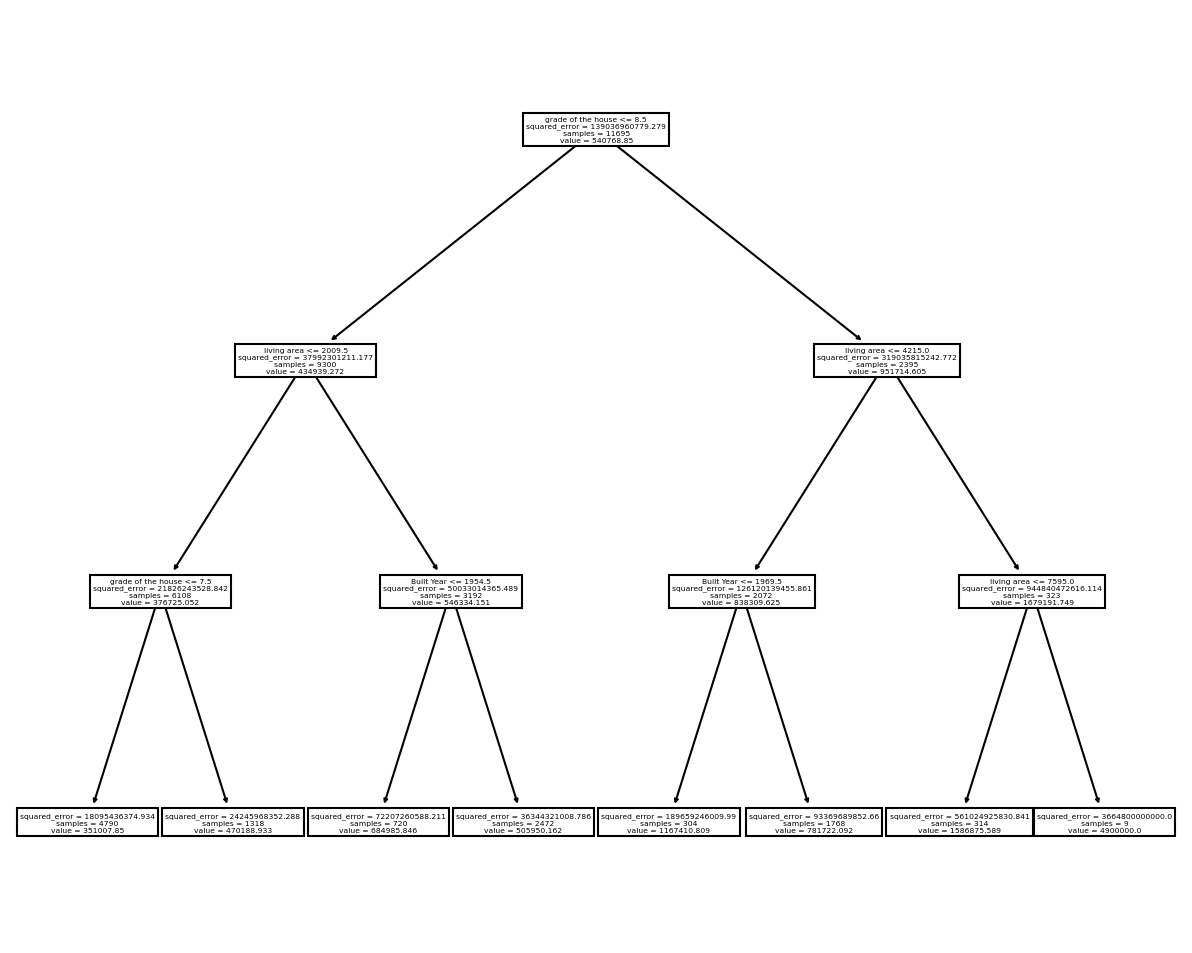

In [24]:
from sklearn.tree import plot_tree

plt.figure(figsize=(10,8), dpi=150)
plot_tree(regressor, feature_names=list(X.columns))
plt.show()


## Logistic Regression

##### მონაცემთა წაკითხვა CSV ფაილიდან

In [25]:
df_erasmus = pd.read_csv('erasmus.csv')
df_erasmus.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   INDEX         341 non-null    int64  
 1   COUNTRIES     341 non-null    object 
 2   UNIVERSITIES  341 non-null    object 
 3   FACULTIES     341 non-null    object 
 4   DEPARTMENTS   339 non-null    object 
 5   EXAM SCORE    341 non-null    float64
 6   GRANT         341 non-null    int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 18.8+ KB


##### მონაცემთა წაკითხვა გასუფთავება

In [26]:
df_erasmus.drop('INDEX', axis=1, inplace=True)


##### მონაცემების დაყოფა დამოუკიდებელ და დამოკიდებულ ნაწილებად

In [27]:
X = df_erasmus.drop('GRANT', axis=1)
y = df_erasmus['GRANT']


##### დამოუკიდებელი მონაცემების ტიპების შემოწმება

In [28]:
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   COUNTRIES     341 non-null    object 
 1   UNIVERSITIES  341 non-null    object 
 2   FACULTIES     341 non-null    object 
 3   DEPARTMENTS   339 non-null    object 
 4   EXAM SCORE    341 non-null    float64
dtypes: float64(1), object(4)
memory usage: 13.4+ KB


##### დამოუკიდებელი ტექსტური მონაცემების ტიპების გარდაქმნა

In [29]:
from sklearn.preprocessing import LabelEncoder

for column in X.select_dtypes(include='object').columns:
    X[column] = LabelEncoder().fit_transform(X[column])


##### დამოუკიდებელი მონაცემების ტიპების შემოწმება

In [30]:
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   COUNTRIES     341 non-null    int32  
 1   UNIVERSITIES  341 non-null    int32  
 2   FACULTIES     341 non-null    int32  
 3   DEPARTMENTS   341 non-null    int32  
 4   EXAM SCORE    341 non-null    float64
dtypes: float64(1), int32(4)
memory usage: 8.1 KB


##### მონაცემების დაყოფა სასწავლო და სატესტო ნაწილებად

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)


##### ლოჯისტიკური რეგრესიის მოდელის სწავლება

In [32]:
from sklearn.linear_model import LogisticRegression

regressor = LogisticRegression(random_state=10)
regressor.fit(X_train, y_train)


LogisticRegression(random_state=10)

##### მოდელის შეფასება

In [33]:
regressor.score(X_test, y_test)


0.8695652173913043

##### სატესტო მონაცემების პროგნოზი

In [34]:
y_pred = regressor.predict(X_test)


##### confusion მატრიცის გამოთვლა

In [35]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm


array([[33,  1],
       [ 8, 27]], dtype=int64)

##### confusion მატრიცაზე გრაფიკის აგება

Text(95.72222222222221, 0.5, 'Truth')

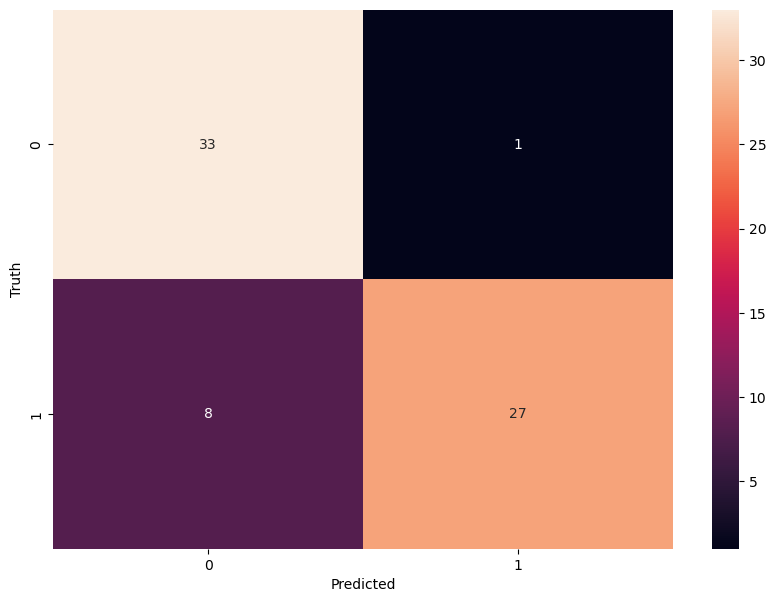

In [36]:
import seaborn as sn

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')


##### classification_report ის გამოთვლა მოდელის შესაფასებლად

In [37]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.80      0.97      0.88        34
           1       0.96      0.77      0.86        35

    accuracy                           0.87        69
   macro avg       0.88      0.87      0.87        69
weighted avg       0.89      0.87      0.87        69



## Decision Tree Clasification

##### მონაცემთა წაკითხვა CSV ფაილიდან

In [38]:
df_erasmus = pd.read_csv('erasmus.csv')
df_erasmus.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   INDEX         341 non-null    int64  
 1   COUNTRIES     341 non-null    object 
 2   UNIVERSITIES  341 non-null    object 
 3   FACULTIES     341 non-null    object 
 4   DEPARTMENTS   339 non-null    object 
 5   EXAM SCORE    341 non-null    float64
 6   GRANT         341 non-null    int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 18.8+ KB


##### მონაცემთა წაკითხვა გასუფთავება

In [39]:
df_erasmus.drop('INDEX', axis=1, inplace=True)


##### მონაცემების დაყოფა დამოუკიდებელ და დამოკიდებულ ნაწილებად

In [40]:
X = df_erasmus.drop('GRANT', axis=1)
y = df_erasmus['GRANT']


##### დამოუკიდებელი მონაცემების ტიპების შემოწმება

In [41]:
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   COUNTRIES     341 non-null    object 
 1   UNIVERSITIES  341 non-null    object 
 2   FACULTIES     341 non-null    object 
 3   DEPARTMENTS   339 non-null    object 
 4   EXAM SCORE    341 non-null    float64
dtypes: float64(1), object(4)
memory usage: 13.4+ KB


##### დამოუკიდებელი ტექსტური მონაცემების ტიპების გარდაქმნა

In [42]:
from sklearn.preprocessing import LabelEncoder

for column in X.select_dtypes(include='object').columns:
    X[column] = LabelEncoder().fit_transform(X[column])


##### დამოუკიდებელი მონაცემების ტიპების შემოწმება

In [43]:
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   COUNTRIES     341 non-null    int32  
 1   UNIVERSITIES  341 non-null    int32  
 2   FACULTIES     341 non-null    int32  
 3   DEPARTMENTS   341 non-null    int32  
 4   EXAM SCORE    341 non-null    float64
dtypes: float64(1), int32(4)
memory usage: 8.1 KB


##### მონაცემების დაყოფა სასწავლო და სატესტო ნაწილებად

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)


##### გადაწყვეტილების ხის კლასიფიკაციის მოდელის სწავლება

In [45]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(min_samples_leaf=5)
classifier.fit(X_train, y_train)


DecisionTreeClassifier(min_samples_leaf=5)

##### მოდელის შეფასება

In [46]:
classifier.score(X_test, y_test)


0.9130434782608695

##### სატესტო მონაცემების პროგნოზი

In [47]:
y_pred = classifier.predict(X_test)


##### გადაწყვეტილების ხის ვიზუალური სქემა

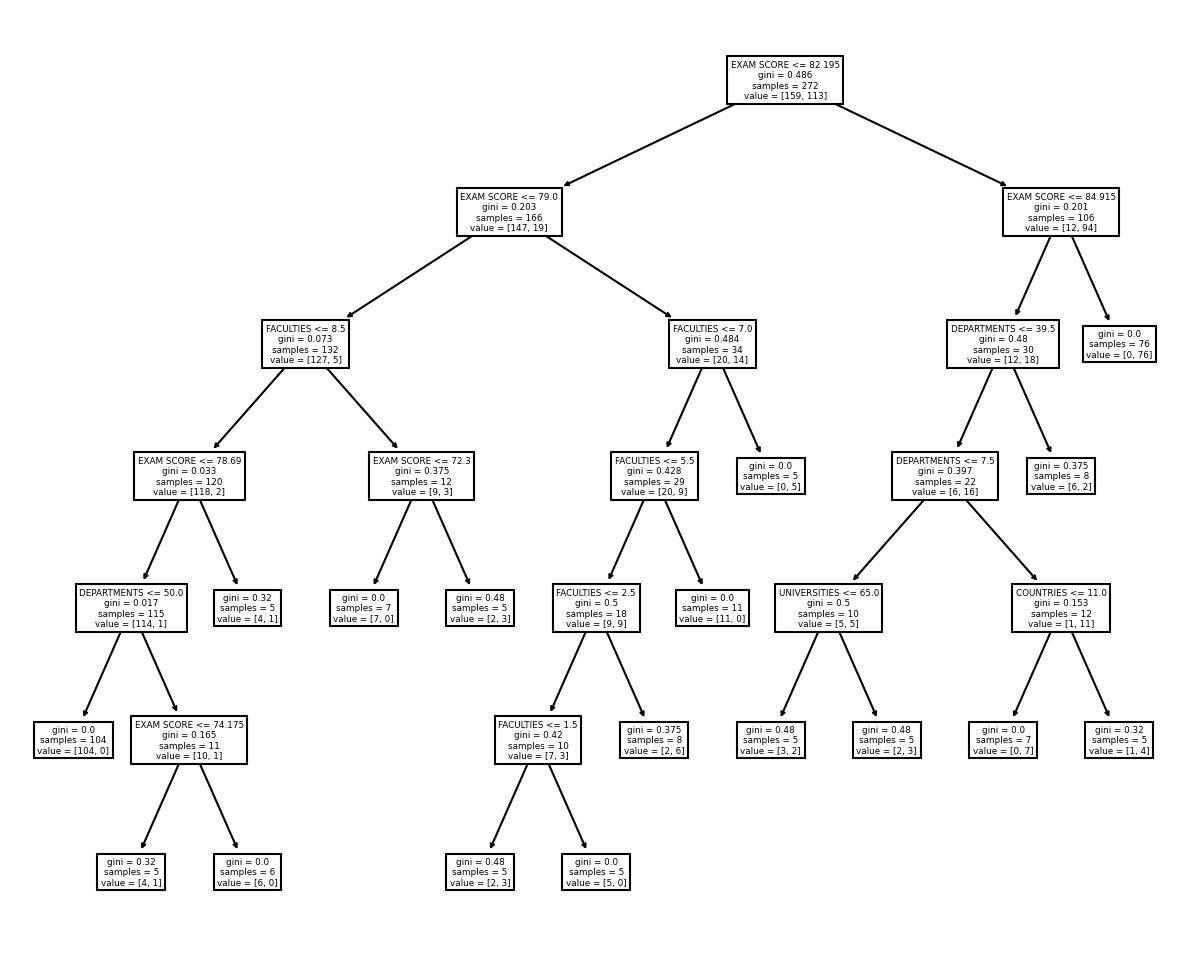

In [48]:
from sklearn.tree import plot_tree

plt.figure(figsize=(10,8), dpi=150)
plot_tree(classifier, feature_names=list(X.columns))
plt.show()


##### confusion მატრიცის გამოთვლა

In [49]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm


array([[33,  1],
       [ 5, 30]], dtype=int64)

##### confusion მატრიცაზე გრაფიკის აგება

Text(95.72222222222221, 0.5, 'Truth')

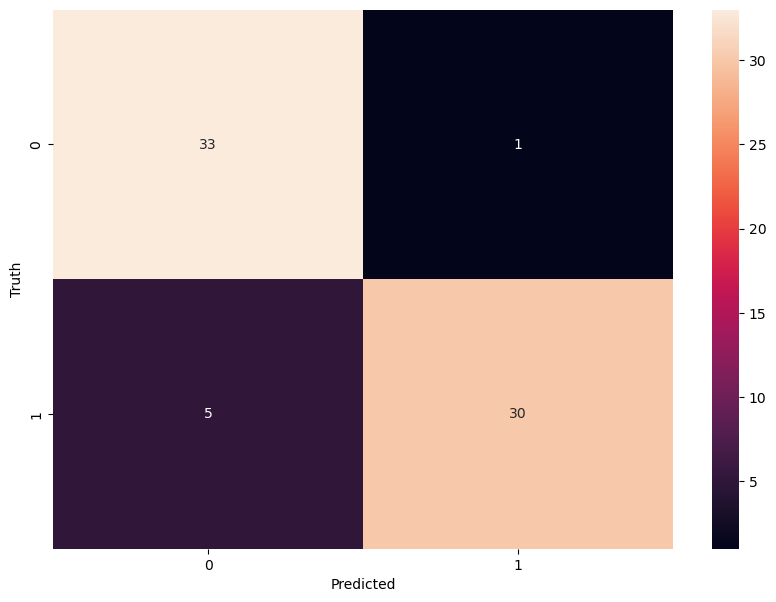

In [50]:
import seaborn as sn

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')


##### classification_report ის გამოთვლა მოდელის შესაფასებლად

In [51]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.87      0.97      0.92        34
           1       0.97      0.86      0.91        35

    accuracy                           0.91        69
   macro avg       0.92      0.91      0.91        69
weighted avg       0.92      0.91      0.91        69

